In [1]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data

In [2]:
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

In [3]:
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/features/250' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_250.csv')]

# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Label mapping

In [4]:
#Sobstitute N, S, V with 0, 1, 2
label_mapping = {'N': 0, 'S': 1, 'V': 2}
for data in all_data_list:
    data['annotation'] = data['annotation'].replace(label_mapping)

# Drop positions columns    

In [5]:
for i in range(len(all_data_list)):
    all_data_list[i] = all_data_list[i].drop(['peak_pos', 'onset', 'diastolic_notch'], axis=1)

In [6]:
all_data_list[0]

,asp,adp,adn,rp,d1,d2,rd,rn,T1,T2,TP,ST,pi2pi_pr,pi2pi_po,area_peak,annotation
0,0.055274,0.823215,0.886627,0.719899,0.042081,0.425326,0.723122,0.288666,0.024067,0.643411,0.967991,0.210000,0.000000,0.015020,0.000992,0
1,0.045354,0.814343,0.884302,0.712917,0.040983,0.423003,0.726116,0.288231,0.024067,0.232558,0.909492,0.229630,0.027357,0.015020,0.000561,0
2,0.045747,0.813519,0.884597,0.712486,0.040809,0.422454,0.726397,0.288305,0.022864,0.232558,0.910596,0.228571,0.027357,0.015020,0.000578,0
3,0.047270,0.813824,0.885389,0.713275,0.040509,0.422070,0.726600,0.288490,0.022864,0.240310,0.911700,0.227586,0.027357,0.008678,0.000659,0
4,0.036112,0.818934,0.883222,0.712234,0.038791,0.425694,0.724313,0.287615,0.027677,0.201550,0.901766,0.240000,0.021094,0.020360,0.000249,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.046900,0.811773,0.884741,0.711761,0.041072,0.421604,0.726617,0.288342,0.025271,0.279070,0.915011,0.225000,0.031641,0.018358,0.000684,0
1956,0.049071,0.812713,0.885598,0.713176,0.040937,0.421452,0.726687,0.288525,0.025271,0.279070,0.915011,0.225000,0.030653,0.017356,0.000793,0
1957,0.047486,0.813713,0.876084,0.713276,0.050609,0.428090,0.762211,0.286395,0.036101,0.333333,0.912804,0.226667,0.029664,0.051736,0.002078,0
1958,0.049821,0.810715,0.870102,0.712228,0.057901,0.430694,0.737648,0.285364,0.046931,0.488372,0.924945,0.219512,0.063612,0.112483,0.005547,0


# Divide train/test

In [7]:
# Split Data
#A list of all csv is gived: because each element of a list represent a patient,
# a patient will stay only or in train or in test
train_list, test_list = train_test_split(all_data_list, test_size=0.2, random_state=42)
train_list, val_list = train_test_split(train_list, test_size=0.2, random_state=42)

In [8]:
#Create a dataframe only for train and one for all test data
train_data = pd.DataFrame()
i = 0
for train in train_list:
    train_data = pd.concat([train_data, train], ignore_index=True)
    i = i + 1

In [9]:
# Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']

In [10]:
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(y_train, columns=['annotation'])

one_hot_encoded_array_train = one_hot_encoded_df.values

print(one_hot_encoded_df)
print(one_hot_encoded_array_train)

           0      1      2
0       True  False  False
1       True  False  False
2       True  False  False
3       True  False  False
4       True  False  False
...      ...    ...    ...
110769  True  False  False
110770  True  False  False
110771  True  False  False
110772  True  False  False
110773  True  False  False

[110774 rows x 3 columns]
[[ True False False]
 [ True False False]
 [ True False False]
 ...
 [ True False False]
 [ True False False]
 [ True False False]]


In [11]:
#Create a dataframe only for train and one for all test data

val_data = pd.DataFrame()

for val in val_list:
    val_data = pd.concat([val_data, val], ignore_index=True) 

In [12]:
X_val = val_data.drop('annotation', axis=1)
y_val = val_data['annotation']

In [13]:
one_hot_encoded_df_val = pd.get_dummies(y_val, columns=['annotation'])

one_hot_encoded_array_val = one_hot_encoded_df_val.values 

In [14]:
test_data = pd.DataFrame()

for test in test_list:
    test_data = pd.concat([test_data, test], ignore_index=True)

In [15]:
X_test = test_data.drop('annotation', axis=1)
y_test= test_data['annotation']

In [16]:
one_hot_encoded_df_test = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test = one_hot_encoded_df_test.values

In [17]:
N_train = (y_train == 0).sum() 
S_train = (y_train == 1).sum() 
V_train = (y_train == 2).sum() 
'''
N_val = (y_val == 0).sum() 
S_val = (y_val == 1).sum() 
V_val = (y_val == 2).sum() 

'''
N_test = (y_test == 0).sum() 
S_test = (y_test == 1).sum() 
V_test = (y_test == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")
'''
N_perc = N_val/(N_val+S_val+V_val)
S_perc = S_val/(N_val+S_val+V_val)
V_perc = V_val/(N_val+S_val+V_val)
'''
print(f"Perc di N in val: {N_perc}")
print(f"Perc di S in val: {S_perc}")
print(f"Perc di V in val: {V_perc}")

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di N in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di V in test: {V_perc}")


Perc di N in train: 0.9161536100529005
Perc di S in train: 0.054245581093036274
Perc di V in train: 0.02960080885406323
Perc di N in val: 0.9161536100529005
Perc di S in val: 0.054245581093036274
Perc di V in val: 0.02960080885406323
Perc di N in test: 0.9049530732924645
Perc di S in test: 0.03013616882764607
Perc di V in test: 0.06491075787988933


# Model

In [18]:
def compute_class_freqs(labels):

    N = labels.shape[0]

    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [19]:
freq_pos, freq_neg = compute_class_freqs(one_hot_encoded_array_train)

print(f"pos freqs: {freq_pos}")

print(f"neg freqs: {freq_neg}")

pos freqs: [0.91615361 0.05424558 0.02960081]
neg freqs: [0.08384639 0.94575442 0.97039919]


In [20]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights
neg_contribution = freq_neg * neg_weights

In [21]:
#Custom loss function
#output loss function is the sum
#epsilon to not have log0

def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        # initialize loss to zero
        loss = 0.0

        for i in range(len(pos_weights)):
            
            loss += tf.keras.backend.mean(-(pos_weights[i] *y_true[:,i] * tf.keras.backend.log(y_pred[:,i] + epsilon)
                             + neg_weights[i]* (1 - y_true[:,i]) * tf.keras.backend.log( 1 - y_pred[:,i] + epsilon)))
        return loss
    return weighted_loss

In [22]:
#@title Calculating Weights
from sklearn.utils.class_weight import compute_class_weight

def calculating_class_weights(y_true):
    num_classes = y_true.shape[1]
    weights = np.empty([num_classes, 2])
    for i in range(num_classes):
        weights[i] = compute_class_weight(class_weight='balanced', classes=[0.,1.], y=y_true[:, i])
    return weights

class_weights = calculating_class_weights(one_hot_encoded_array_train)

keys = np.arange(0,9,1)
weight_dictionary_fold = dict(zip(keys, class_weights.T[1]))
weight_dictionary_fold

{0: 0.5457600063062885, 1: 9.217340655683142, 2: 16.891430314120157}

In [23]:
from keras.layers import BatchNormalization
model = Sequential()

# Input layer
model.add(Dense(18, activation="relu", input_shape=(len(all_data_list[0].columns) - 1,)))

model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(5, activation="relu"))
#model.add(Dense(8, activation="relu"))

# Output layer

model.add(Dense(3, activation='softmax'))

C:\Users\cricr\PycharmProjects\Ai-proj\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
nN = np.count_nonzero(y_train == 0)
nV = np.count_nonzero(y_train == 1)
nS = np.count_nonzero(y_train == 2)

class_sum = nN+nV+nS
wN = round(1-(nN/class_sum),2)
wV = round(1-(nV/class_sum),2)  
wS = round(1-(nS/class_sum),2)

class_weights_fed = {0: wN, 1: wV, 2: wS}

print(class_weights_fed)

{0: 0.08, 1: 0.95, 2: 0.97}


In [25]:
model.compile(optimizer= tf.keras.optimizers.Nadam(), 
              loss=get_weighted_loss(pos_weights, neg_weights), 
              metrics=['Accuracy', 'Precision', 'Recall' ])

In [26]:
#model.compile(optimizer= tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall' ])

In [27]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,          # Number of epochs with no improvement after which training will stop
    verbose=1,           # Verbosity mode (1 for printing messages)
    restore_best_weights=True  # Restore the best model weights when training stops
)

In [28]:
modelHistory = model.fit(X_train, 
                         one_hot_encoded_array_train, 
                         epochs=60, 
                         batch_size=16, 
                         validation_data=(X_val, one_hot_encoded_array_val),
                         class_weight = class_weights_fed,
                         callbacks=[early_stopping] 
                         ).history

Epoch 1/60
6924/6924 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - Accuracy: 0.5754 - Precision: 0.6175 - Recall: 0.1714 - loss: 0.0381 - val_Accuracy: 0.8120 - val_Precision: 0.9299 - val_Recall: 0.6829 - val_loss: 0.1363
Epoch 2/60
6924/6924 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - Accuracy: 0.7131 - Precision: 0.8754 - Recall: 0.5286 - loss: 0.0333 - val_Accuracy: 0.7507 - val_Precision: 0.9260 - val_Recall: 0.6656 - val_loss: 0.1336
Epoch 3/60
6924/6924 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - Accuracy: 0.7103 - Precision: 0.8855 - Recall: 0.5843 - loss: 0.0318 - val_Accuracy: 0.7338 - val_Precision: 0.8831 - val_Recall: 0.6761 - val_loss: 0.1376
Epoch 4/60
6924/6924 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - Accuracy: 0.7308 - Precision: 0.8675 - Recall: 0.6295 - loss: 0.0295 - val_Accuracy: 0.8301 - val_Precision: 0.9378 - val_Recall: 0.7119 - val_loss: 0.1350
Epoch 5/60
6924/6924 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - Accuracy: 0.7268 - Precision: 0.8582 - Recall: 0.6409 - loss: 0.0293 - val_Accuracy: 0.7720

# Evaluation

In [29]:
def model_evaluation(y_predi, model_name_pred):

    predicted_class = np.argmax(y_predi, axis=-1)
    test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)
    cm = confusion_matrix(test_classes, predicted_class)
    classes_name = ['N', 'S', 'V']
    '''
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.show()
    '''
    
    #Normalized cm
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')
    plt.title(model_name_pred)
    plt.show()

1153/1153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


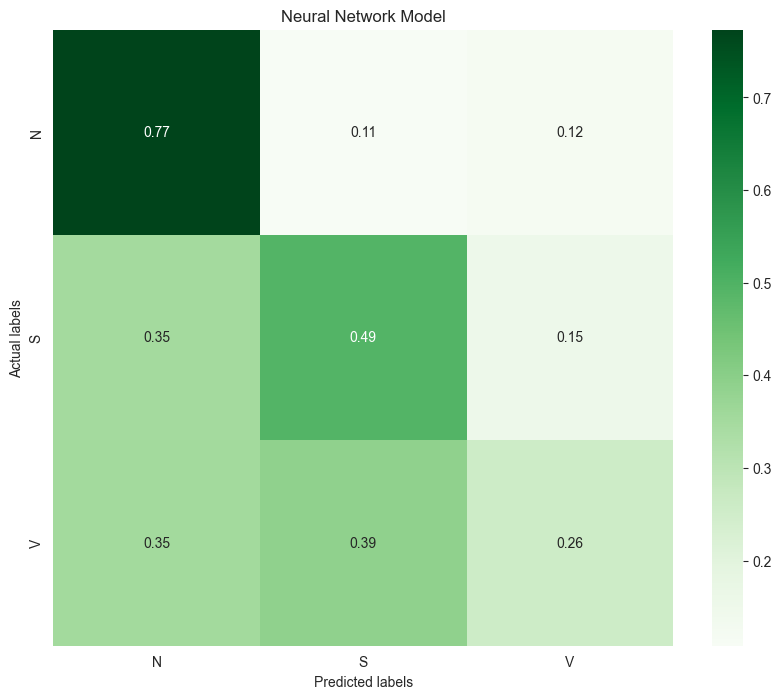

In [30]:
y_predi = model.predict(X_test)

model_evaluation(y_predi, "Neural Network Model")

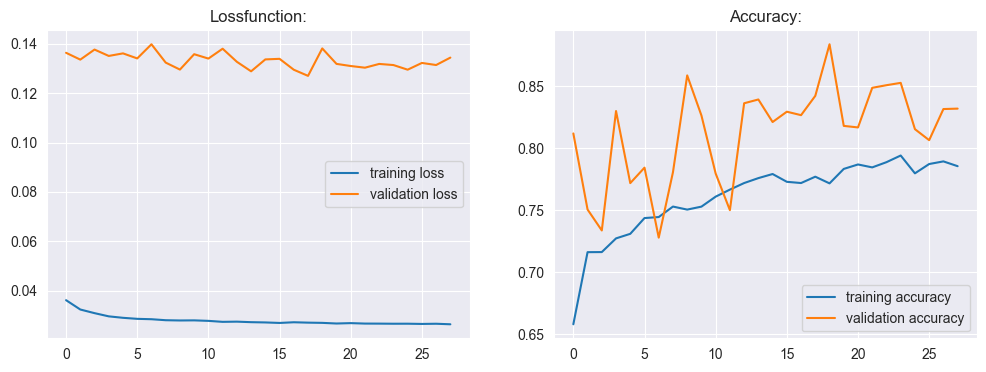

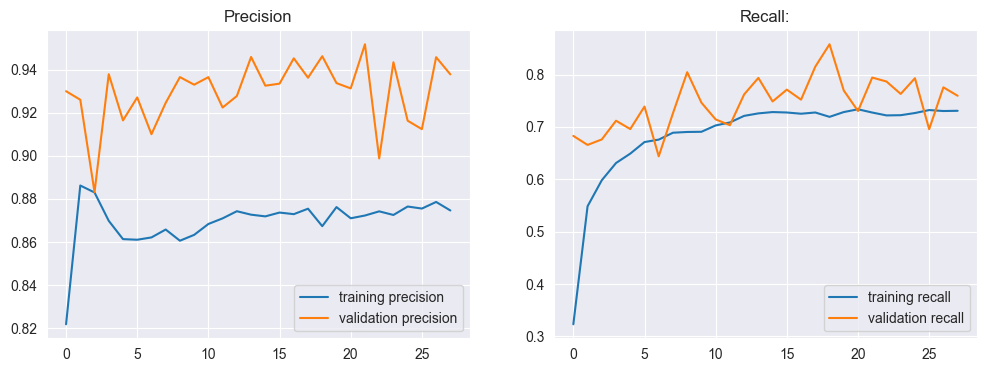

In [31]:
#plot performances
history = modelHistory
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['loss'], label="training loss")
plt.plot(history['val_loss'], label="validation loss")
plt.title('Lossfunction:')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['Accuracy'], label="training accuracy")
plt.plot(history['val_Accuracy'], label="validation accuracy")
plt.title('Accuracy:')
plt.legend()

#plot performances
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['Precision'], label="training precision")
plt.plot(history['val_Precision'], label="validation precision")
plt.title('Precision')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['Recall'], label="training recall")
plt.plot(history['val_Recall'], label="validation recall")
plt.title('Recall:')
plt.legend()